# Visualising Using Seaborn

**In this section, we'll take a lookat the Pokémon dataset that is available in [Kaggle](https://www.kaggle.com/rounakbanik/pokemon) and we'll try to have fun practicing data analysis and visualisation using Pandas and Seaborn.We'll be doing simple analysis such as counting, filtering, cleaning the data and some basic plotting techniques.**

<span style="color:gray">**Note: The dataset only contains all the Pokémon until generation 6, the generation 7 dataset can be taken from [here](https://www.kaggle.com/rounakbanik/pokemon)**</span>


**Table of Contents**
* Missing Values
   * Wether missing values are present or not
   * Visualise them
   * Learn how to impute them
* Analysing Datatypes

Let's start by importing all the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

<span style="color:gray">**In the case of a real-world dataset, it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete. That’s why we use some imputation techniques to replace the NaN values with some probable values. But before doing that we need to have a good understanding of how the NaN values are distributed in our dataset.
_Missingno_ library offers a very nice way to visualize the distribution of NaN values. _Missingno_ is a Python library and compatible with Pandas**</span>

Now we can load the dataset, let's name the dataframe **pokedata** and take a look at the first and the last 5 rows of the dataset to get a general knowledge of the data.

In [2]:
pokedata = pd.read_csv("/home/mihir/Desktop/Test/DataSet/Pokemon/pokemon.csv")

In [3]:
pokedata.shape

(801, 41)

## Missing Values

In this section we will see:
* Wether missing values are present or not
* Visualise them
* Learn how to impute them

### Checking wether missing vlaues are present or not

In [4]:
pokedata.isnull().values.any()

True

Missing values are present in the dataframe. Collect columns with missing values into a list:

In [5]:
cols_missing_val = pokedata.columns[pokedata.isnull().any()].tolist()
cols_missing_val

['height_m', 'percentage_male', 'type2', 'weight_kg']

There are _4_ columns with missing values.

Let us get the exact count of each of the missing data in each columns:

In [6]:
for col in cols_missing_val:
    print("%s: %d" % (col, pokedata[col].isnull().sum()))

height_m: 20
percentage_male: 98
type2: 384
weight_kg: 20


### Visualising missing values

Over here we will be using `missingno` which offers a very nice way to display null values. 

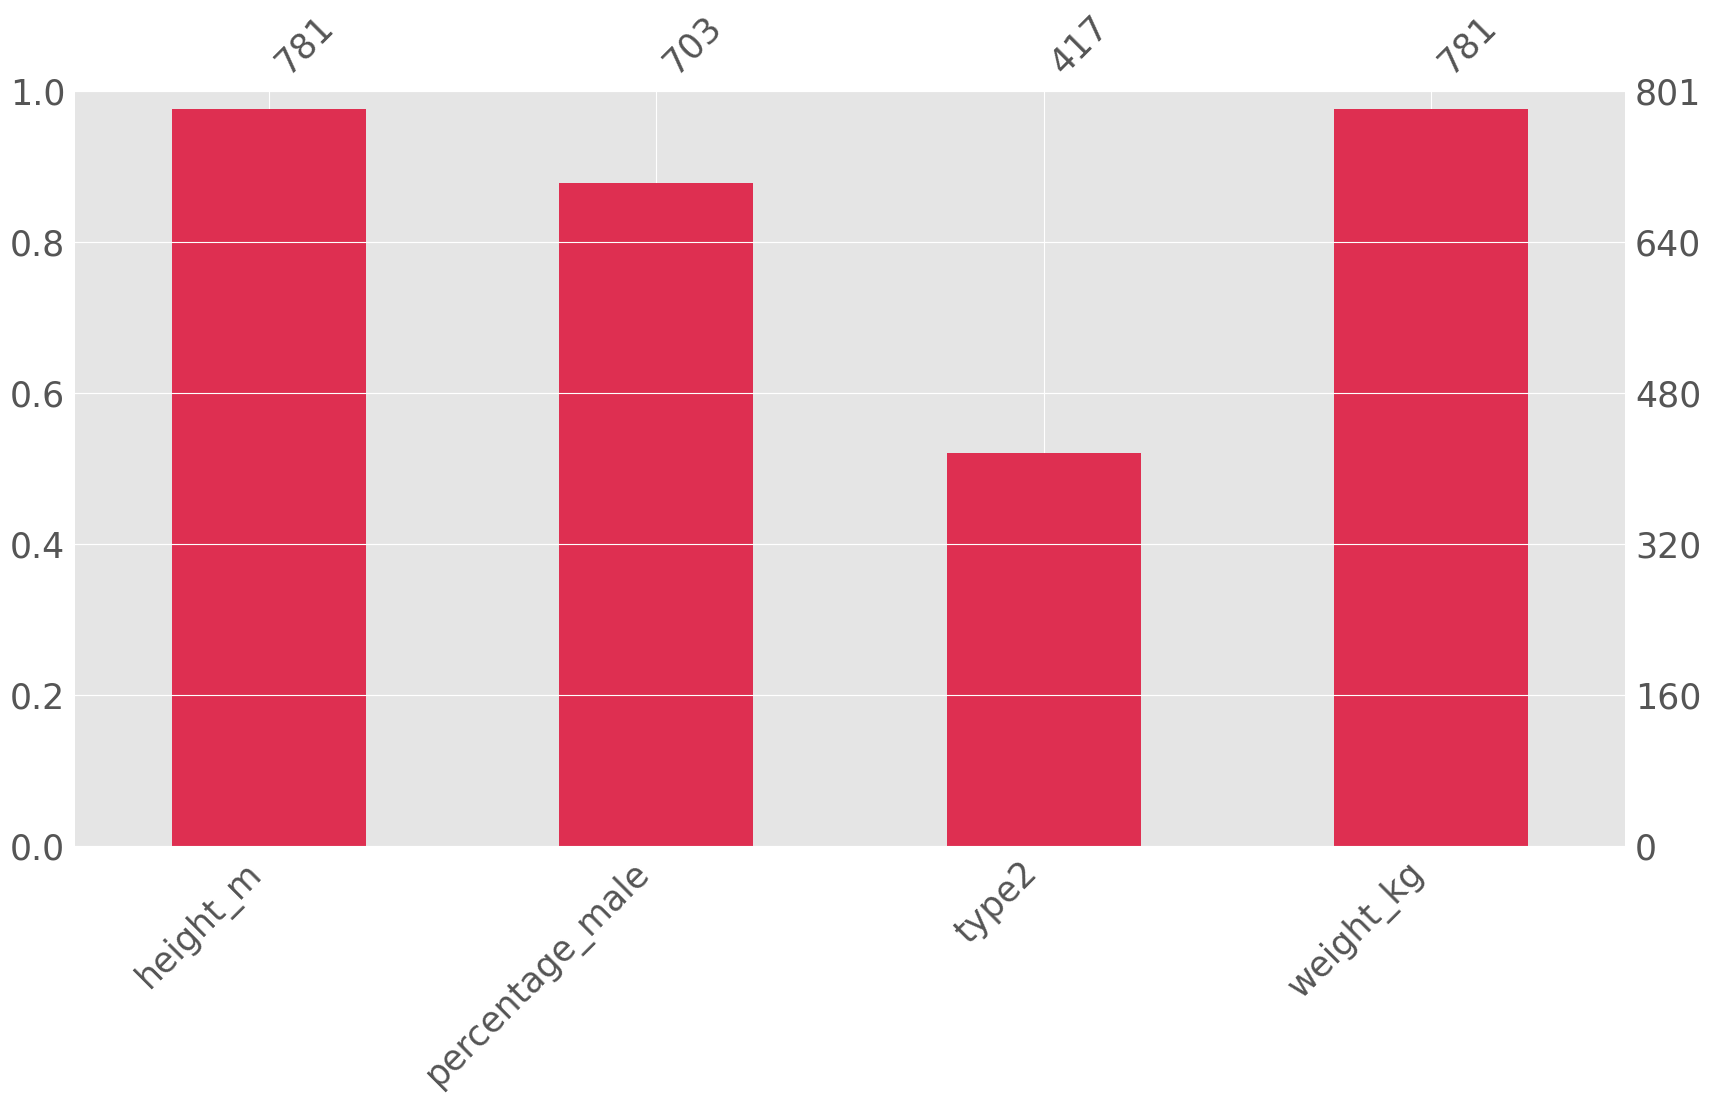

In [7]:
msno.bar(pokedata[cols_missing_val], figsize = (20, 10), color = "#de2f51", fontsize = 25, labels = True)

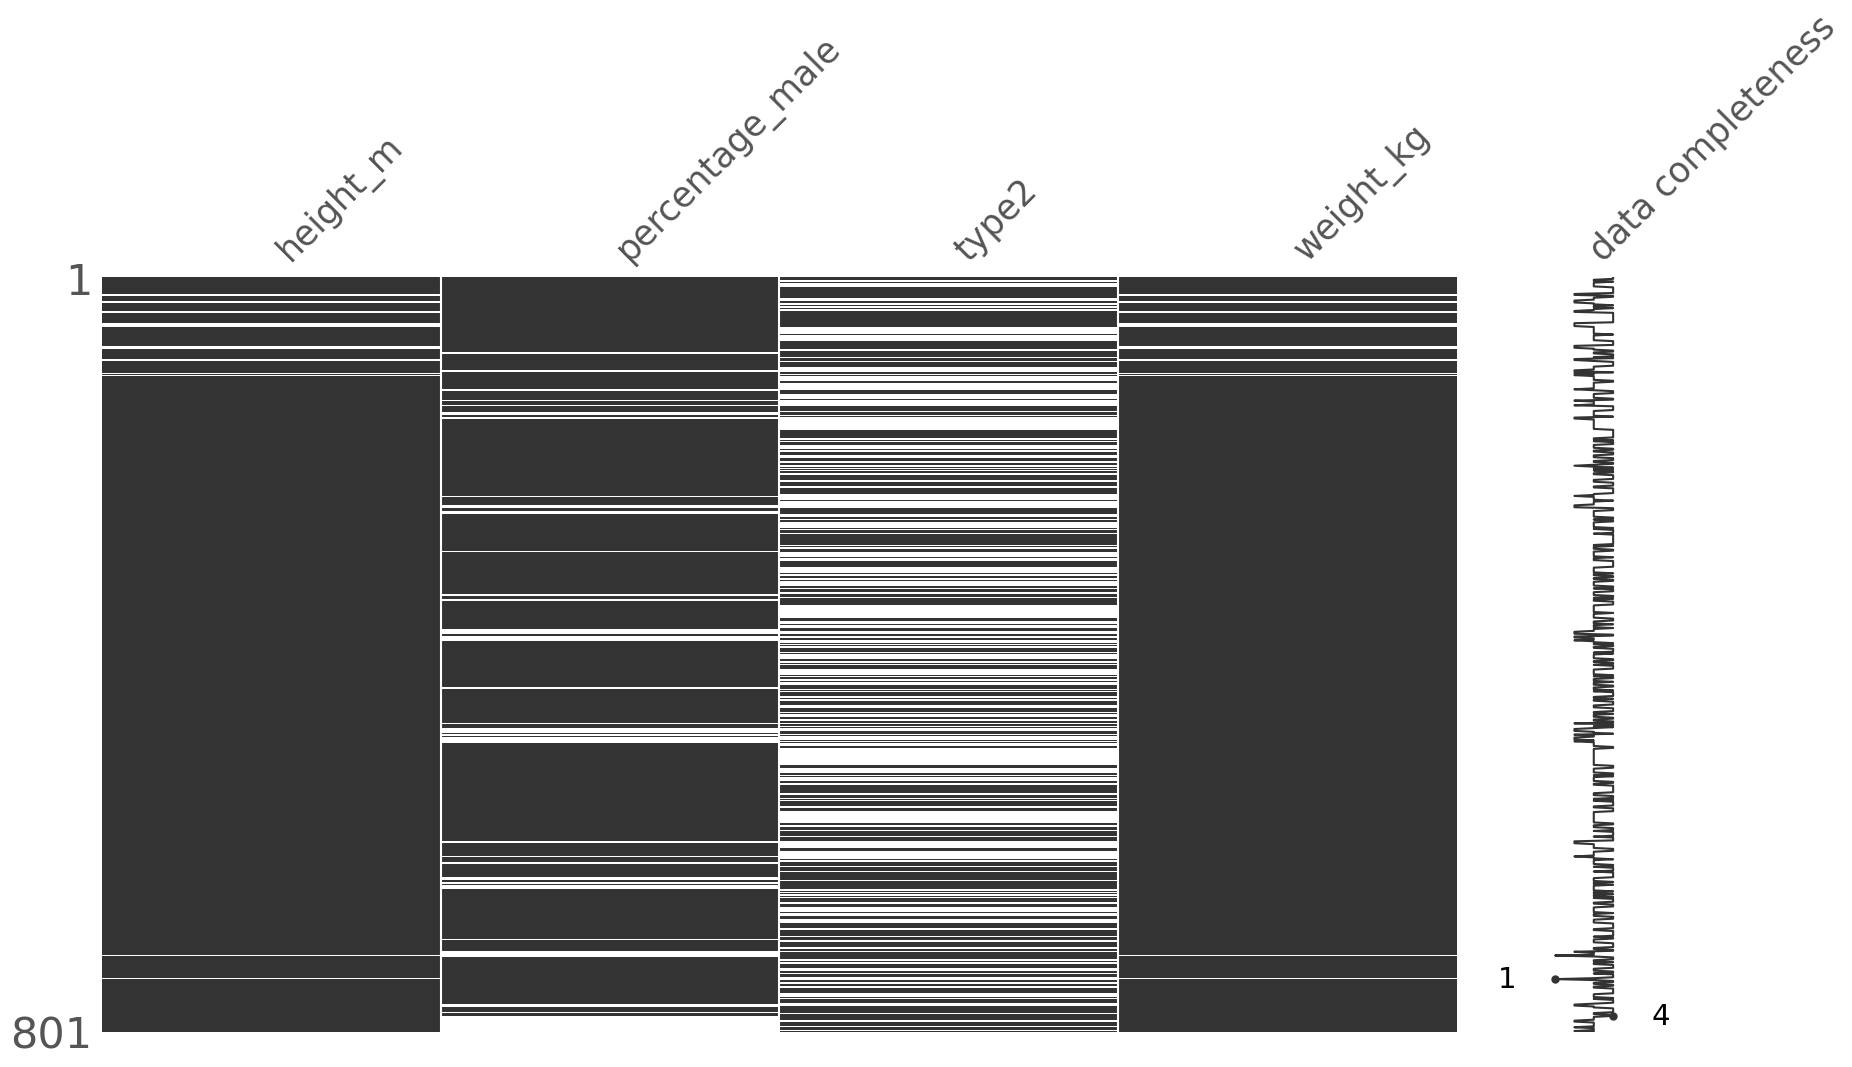

In [8]:
msno.matrix(pokedata[cols_missing_val], width_ratios = (10, 1), figsize = (20, 10), color = (0.2, 0.2, 0.2), fontsize = 25, sparkline = True, labels = True)

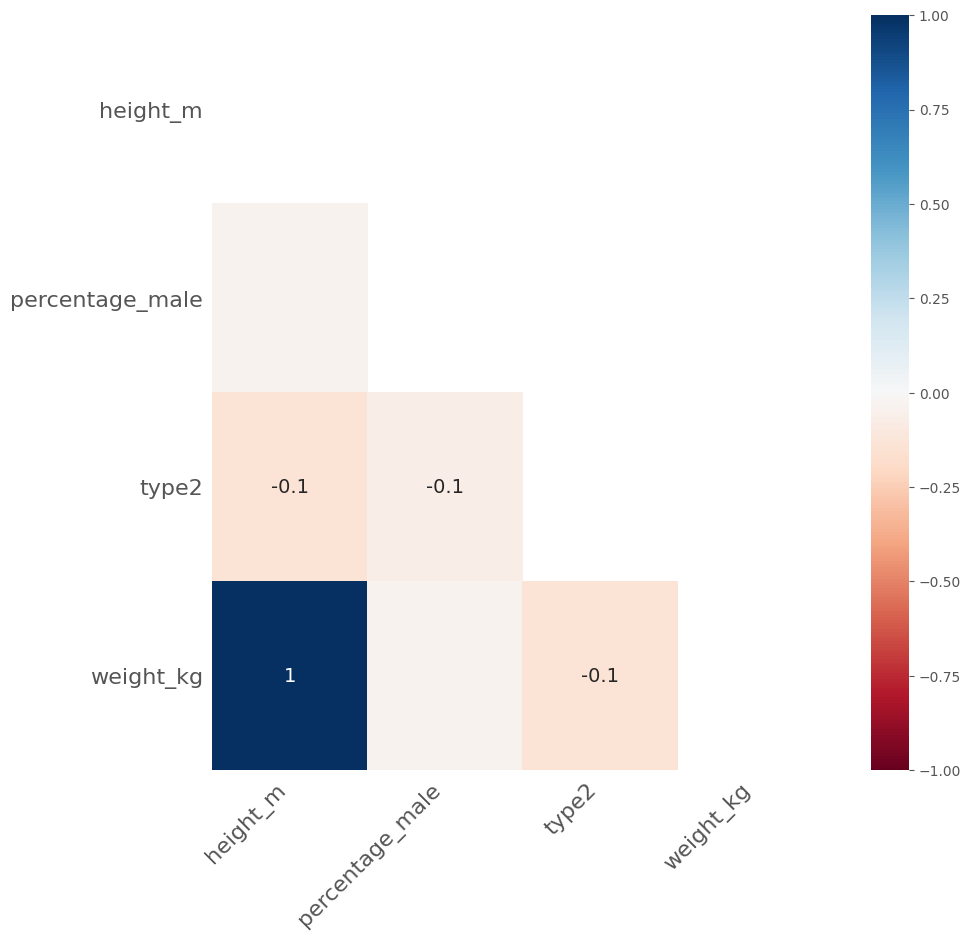

In [9]:
msno.heatmap(pokedata[cols_missing_val], figsize = (10, 10))

### Imputing Missing Values

In order to impute missing values in each columns, the other values must be seen as well.

The following snippet shows the number of unique values in each of the columns having missing values.

In [10]:
for col in cols_missing_val:
    print("%s: %d" % (col, pokedata[col].nunique()))

height_m: 51
percentage_male: 7
type2: 18
weight_kg: 421


**percentage_male**: The percentage of the species that are male. Blank if the Pokemon is gender neutral. Hence gender neutral pokemon can be assigned **-1**.

In [11]:
pokedata['percentage_male'].fillna(np.int(-1), inplace = True)
pokedata['percentage_male']

0      88.1
1      88.1
2      88.1
3      88.1
4      88.1
       ... 
796    -1.0
797    -1.0
798    -1.0
799    -1.0
800    -1.0
Name: percentage_male, Length: 801, dtype: float64

**type2**: Let's take a look at the various string elements present.

In [12]:
pokedata['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

We will assign missing values with some string not present in the list.

In [13]:
pokedata['type2'].fillna('HHH', inplace = True)
pokedata['type2']

0      poison
1      poison
2      poison
3         HHH
4         HHH
        ...  
796    flying
797     steel
798    dragon
799       HHH
800     fairy
Name: type2, Length: 801, dtype: object

**height_m** and **weight_kg**: We will replace the missing values with **0**.

In [14]:
pokedata['height_m'].fillna(np.int(0), inplace = True)
pokedata['weight_kg'].fillna(np.int(0), inplace = True)

Now let's check if there are still any missing values in our data.

In [15]:
pokedata.isnull().values.any()

False

## Analysing Datatypes

In this section we will see:
* Different datatypes present in the dataframe
* Visualize the same

In [16]:
print(pokedata.dtypes.unique())
print(pokedata.dtypes.nunique())

[dtype('O') dtype('float64') dtype('int64')]
3


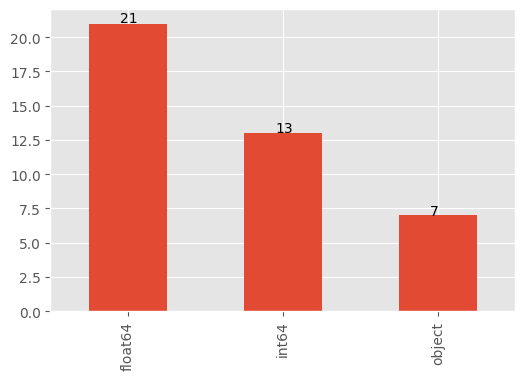

In [17]:
ax = pd.value_counts(pokedata.dtypes).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2.5, p.get_height() * 1.005))

## Memory Consumption

Memeory usage is an important aspect when dealing with hardware of limited capacity.

In this section we will see:
* How we can moniter the memory usage using pandas
* Reduce the same by reassigning different datatypes

In [18]:
mem = pokedata.memory_usage(index = True).sum()
print("Memory consumed by the training set:\t{} MB".format(mem / 1024 ** 2))

Memory consumed by the training set:	0.25067901611328125 MB


By altering the datatype we can reduce the memory usage.

First we will reduce the possible integer datatypes.

In [19]:
def change_datatypes(df):
    int_cols = list(df.select_dtypes(include = ['int']).columns)
    for col in int_cols:
        if ((np.max(df[col]) < 127) and (np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767 ) and (np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) < 2147483647) and (np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)
            
change_datatypes(pokedata)

In [20]:
mem = pokedata.memory_usage(index = True).sum()
print("Memory consumed by the training set:\t{} MB".format(mem / 1024 ** 2))

Memory consumed by the training set:	0.19109535217285156 MB


We can see a reduction in memory used to store the datatframe.

Now let's reduce the columns of type **float64** to type **float32**.

In [21]:
def change_datatypes_float(df):
    float_cols = list(df.select_dtypes(include = ['float']).columns)
    for col in float_cols:
        df[col] = df[col].astype(np.float32)
        
change_datatypes_float(pokedata)

mem = pokedata.memory_usage(index = True).sum()
print("Memory consumed by the training set:\t{} MB".format(mem / 1024 ** 2))

Memory consumed by the training set:	0.12692832946777344 MB


We can see a further reduction in memory usage. So overall we have reduced the dataframe size by **~50%** from **0.25 MB** to **0.12 MB**.

## Data Exploration

Let us now explore the data present in different columns based on the various types.

In [22]:
object_cols = list(pokedata.select_dtypes(include = ['object']).columns)
object_cols

['abilities',
 'capture_rate',
 'classfication',
 'japanese_name',
 'name',
 'type1',
 'type2']

### Primary and Secondary types

Every pokemon is either a primary type (**type1**) or a combination of both primaty and secondary type (**type2**). As a result some pokemon do not have a type2 variable, hence they are left to be with missing values.

In [23]:
pokedata = pokedata.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('HHH', np.nan)

In [24]:
pokedata['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [25]:
pokedata['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [26]:
single_type_pokemon = pokedata[pokedata.type2.isnull()].name
dual_type_pokemon = pokedata[pokedata.type2.notna()].name

print(len(single_type_pokemon), len(dual_type_pokemon))

384 417


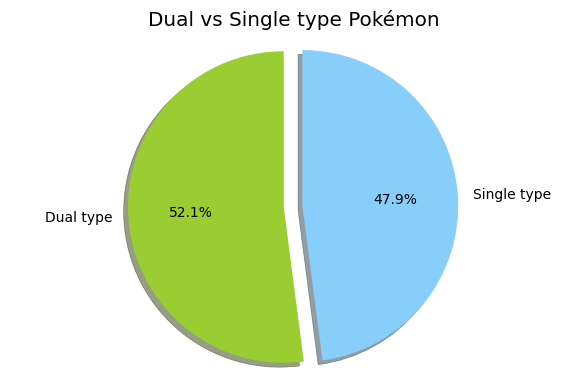

In [27]:
data = [417, 384]
color = ['yellowgreen', 'lightskyblue']

plt.pie(data,
       labels = ['Dual type', 'Single type'],
       shadow = True,
       colors = color,
       explode = (0, 0.12),
       startangle = 90,
       autopct = '%1.1f%%')

plt.axis('equal')
plt.title('Dual vs Single type Pokémon')

plt.tight_layout()
plt.show()

Primary pokemon type distribution:

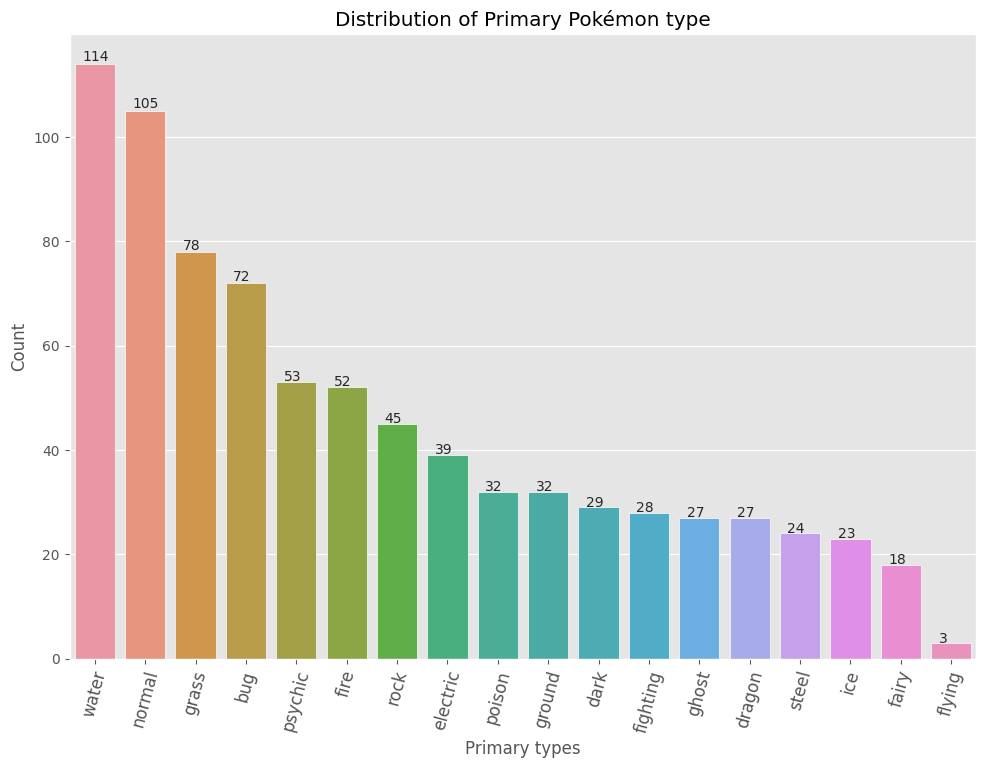

In [28]:
pt = pd.value_counts(pokedata['type1'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x = pt.index, y = pt, data = pokedata)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel = 'Primary types', ylabel = 'Count')
ax.set_title('Distribution of Primary Pokémon type')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.15, each.get_height() * 1.005))

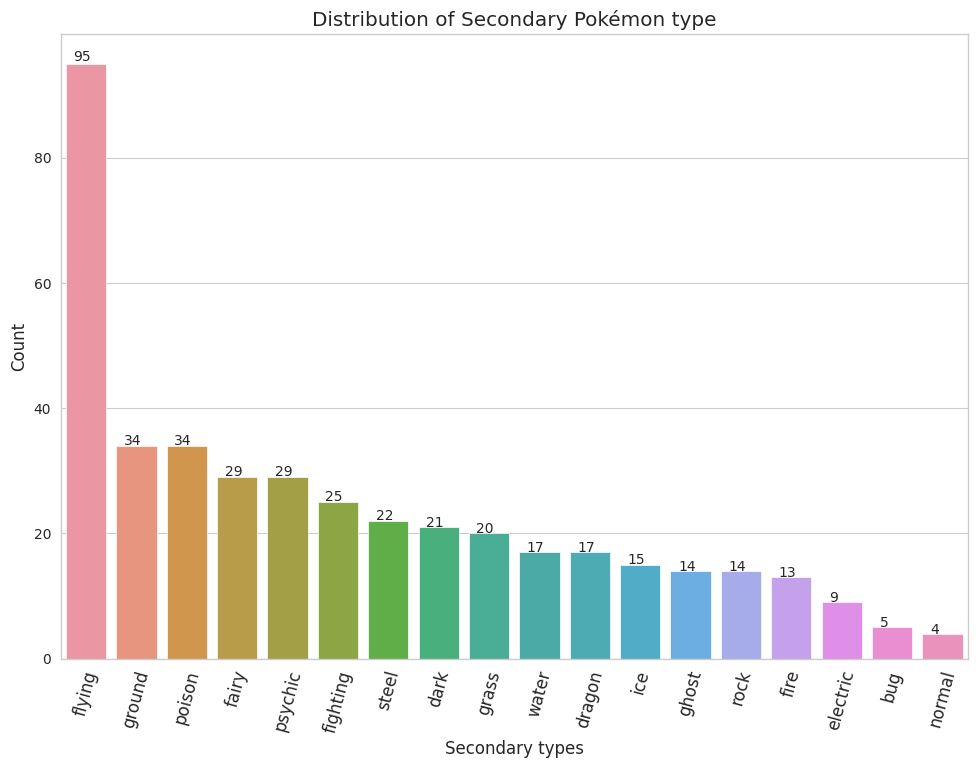

In [29]:
pt = pd.value_counts(pokedata['type2'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x = pt.index, y = pt, data = pokedata)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel = 'Secondary types', ylabel = 'Count')
ax.set_title('Distribution of Secondary Pokémon type')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.15, each.get_height() * 1.005))

### Pokémon type combinations

We have already seen what are the most and least common type of Pokémon, it will also be interesting to see all the type combination of the Pokémon, note that we will not include Pokémon that doesn't have secondary type.

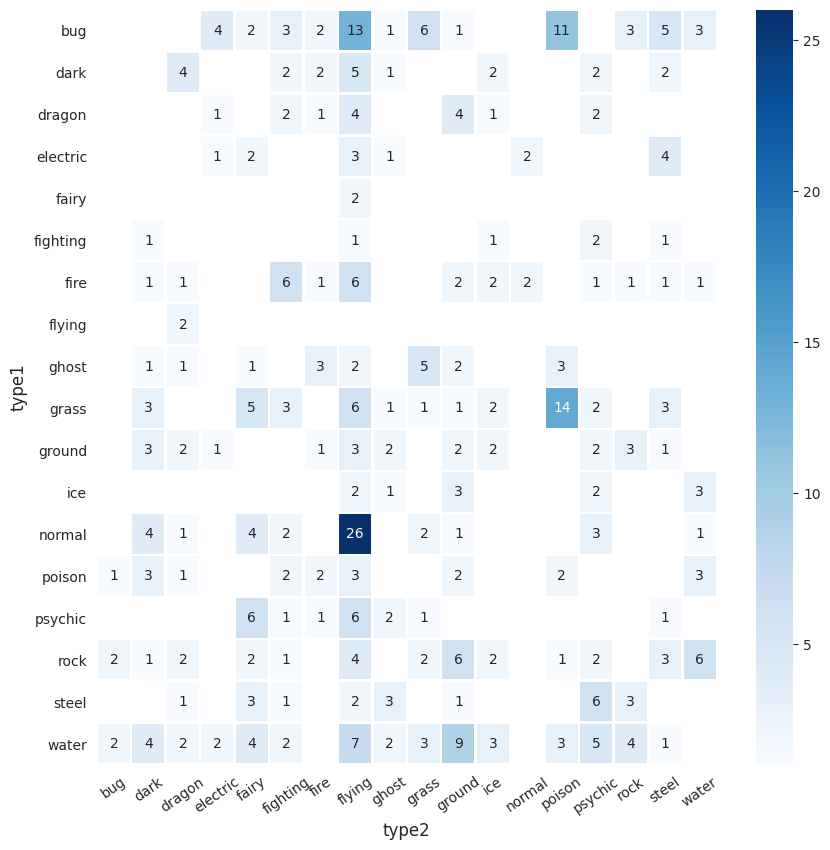

In [30]:
plt.subplots(figsize = (10, 10))

sns.heatmap(
    pokedata[pokedata.type2.notnull()].groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap='Blues'
)

plt.xticks(rotation = 35)
plt.show()

**Observation:**

* Normal/Flying, Grass/Poison and Bug/Flying are the top 3 combinartion for dual-type Pokémon.

**Issue:**

* There is one issue that I noticed as to there are few Pokémon with their primary and secondary type both being the same. For example, (Poison/Poison, 2), (Fire/Fire, 1). I would like to dig in to check if this is true or just an issue with data scraping or if the type2 is given by accident.

We are going to see total how many Pokémon have the same element in **type1** and **type2**.

In [31]:
same_t1_t2 = pokedata[pokedata.type1 == pokedata.type2]

print('Number of Pokémon with same type 1 and type2:', len(same_t1_t2))
print(same_t1_t2.name)

Number of Pokémon with same type 1 and type2: 7
25         Raichu
49        Diglett
50        Dugtrio
87         Grimer
88            Muk
491       Shaymin
554    Darmanitan
Name: name, dtype: object


As we can see the Pokémon are actually just type 1 Pokémon and not type1 and type2. So what we will do is we will remove the type2 of this Pokemon and change to **None** 

In [32]:
pokedata.type2[pokedata.type1 == pokedata.type2] = np.nan
pokedata.type2[pokedata.type1 == pokedata.type2]

/home/mihir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Series([], Name: type2, dtype: object)

### Classification

The classification of Pokémon as descibed by the Sun and Moon Pokedex. Apart from classifying Pokémon based on their natural type (water, fire, etc.), they can also be classified by their physical traits which is shown here.

In [33]:
pokedata['classfication'].nunique()

588

In [34]:
c = pd.value_counts(pokedata['classfication'])

for i in range(0, 10):
    print("{}: {}".format(c.index[i], c[i]))

Dragon Pokémon: 8
Mushroom Pokémon: 6
Mouse Pokémon: 6
Fairy Pokémon: 5
Fox Pokémon: 5
Flame Pokémon: 5
Balloon Pokémon: 5
Tadpole Pokémon: 4
Drill Pokémon: 4
Seed Pokémon: 4


### Percentage Male

This feature explains how the population of the Pokémon is distributed between male and female. Greater the percentage, greater is the distribution of male gender in the particular Pokémon. **-1** means that the Pokémon is gender neutral.

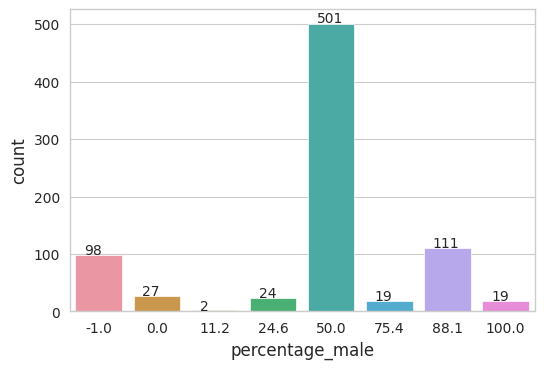

In [35]:
ax = sns.countplot(x = pokedata['percentage_male'], data = pokedata)

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.15, each.get_height() * 1.005))

Let us drill deeper in the sub-division of the following gender.

In [36]:
print('Entirely male Pokémon population: ', len(pokedata[pokedata.percentage_male == 100.00]))
print('Entirely female Pokémon population: ', len(pokedata[pokedata.percentage_male == 0.00]))
print('Gender neutral Pokémon population: ', len(pokedata[pokedata.percentage_male == -1]))
print('Majority male Pokémon population: ', len(pokedata[pokedata.percentage_male > 50.00]))
print('Majority female Pokémon population: ', len(pokedata[(pokedata.percentage_male < 50.00) & (pokedata.percentage_male > 0.00)]))
print('Equal male and female Pokémon population: ', len(pokedata[pokedata.percentage_male == 50.00]))

Entirely male Pokémon population:  19
Entirely female Pokémon population:  27
Gender neutral Pokémon population:  98
Majority male Pokémon population:  149
Majority female Pokémon population:  26
Equal male and female Pokémon population:  501


### Capture Rate

Describes the rate at which a pokemon can be captured into a pokeball after a fight. Higher the value easier it is to capture the pokemon.

Let's see the list of possible values:

In [37]:
pokedata['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

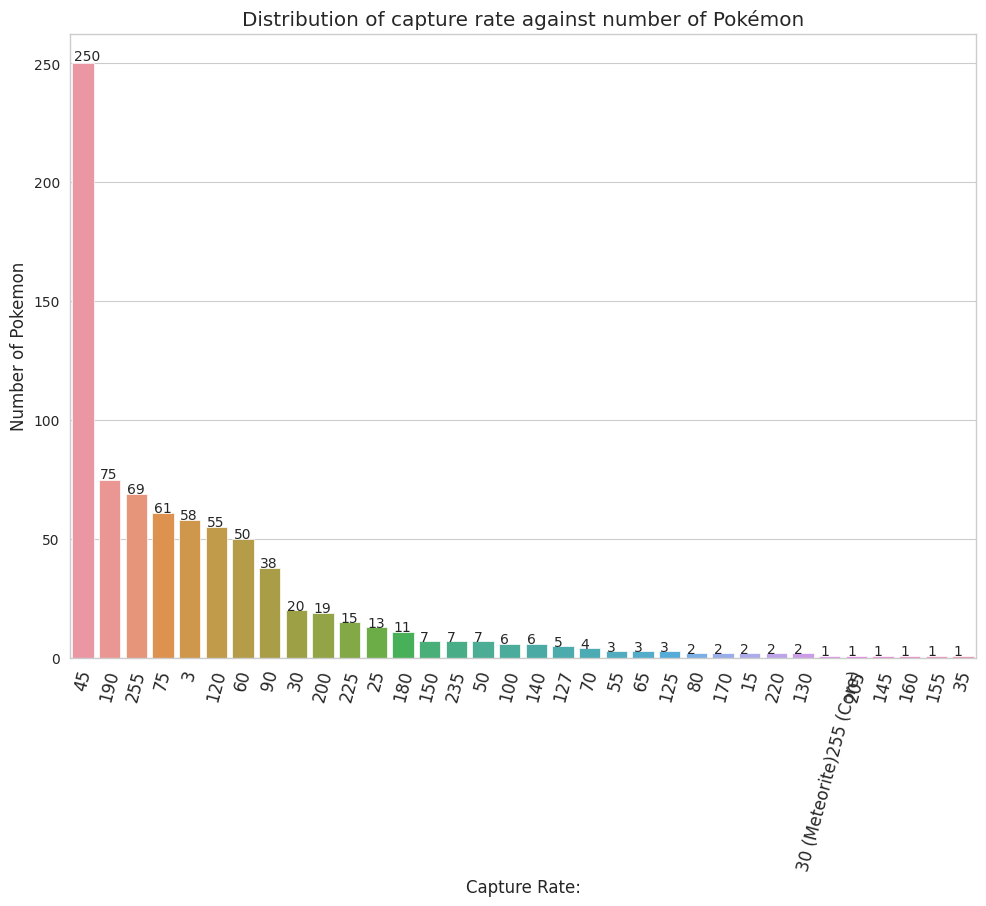

In [38]:
yy = pd.value_counts(pokedata['capture_rate'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style('whitegrid')

ax = sns.barplot(x = yy.index, y = yy, data = pokedata)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel = 'Capture Rate:', ylabel = 'Number of Pokemon')
ax.set_title('Distribution of capture rate against number of Pokémon')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

### Abilities

Each Pokémon can have one or a list of possible powers.

Let's see the list of possible abilities:

In [39]:
pokedata.abilities.nunique()

482

In [40]:
pokedata.abilities.head(20).unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']"],
      dtype=object)

As we can see many pokemon have more than one ability.

We need to drill down to see which Pokémon have such individual abilities and which of them are the most prevalent.

{'Pure Power', 'Poison Touch', 'Beast Boost', 'Forewarn', 'Anger Point', 'Bad Dreams', 'Swarm', 'Overcoat', 'Defiant', 'Power of Alchemy', 'Big Pecks', 'Anticipation', 'Steadfast', 'Sniper', 'Pixilate', 'Liquid Ooze', 'Scrappy', 'Protean', 'Clear Body', 'Storm Drain', 'Guts', 'Quick Feet', 'Rock Head', 'Queenly Majesty', 'Fairy Aura', 'Prism Armor', 'Mold Breaker', 'Early Bird', 'Imposter', 'Symbiosis', 'Stamina', 'Dark Aura', 'Psychic Surge', 'Inner Focus', 'Normalize', 'Motor Drive', 'Aroma Veil', 'Shield Dust', 'Healer', 'Keen Eye', 'Turboblaze', 'Misty Surge', 'Stall', 'Natural Cure', 'Liquid Voice', 'Sand Veil', 'Effect Spore', 'Poison Point', 'Snow Warning', 'Tangling Hair', 'Shell Armor', 'Sheer Force', 'Sand Stream', 'Flash Fire', 'Galvanize', 'Tough Claws', 'Strong Jaw', 'Gluttony', 'Honey Gather', 'Toxic Boost', 'Thick Fat', 'Magician', 'Shields Down', 'Mega Launcher', 'Triage', 'Weak Armor', 'Leaf Guard', 'Water Veil', 'Truant', 'Wonder Skin ', 'Flare Boost', 'Battle Bond', 

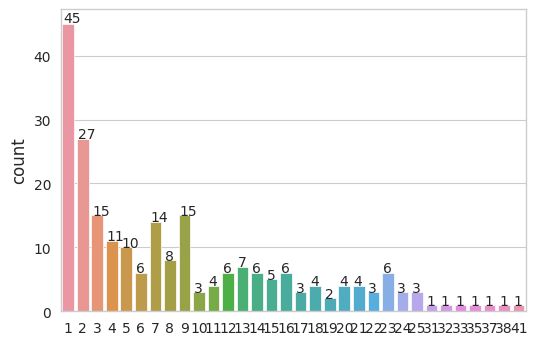

In [41]:
import re

list_ability = pokedata.abilities.tolist()
new_list = list()

for i in range(0, len(list_ability)):
    m = re.findall(r"'(.*?)'", list_ability[i], re.DOTALL)
    for j in range(0, len(m)):
        new_list.append(m[j])
        
list1 = set(new_list)
print(list1)
print(len(list1))

from collections import Counter
count = pd.Series(pokedata.abilities.str.replace('[\[\]\'\s]', '').str.split(',').map(Counter).sum())

print(count.index)
ax = sns.countplot(count)

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

So now we have 227 unique abilities for all 801 Pokémon!

So upto now we have seen all the deatures of type object (string datatypes).

Now let us move on to the features of numeric datatypes.

### Pokedex Number

The entry number of the Pokémon in the National Pokedex. Here each Pokémon is assigned a number from 1 - 801.

In [42]:
pokedata.pokedex_number.describe()

count    801.000000
mean     401.000000
std      231.373075
min        1.000000
25%      201.000000
50%      401.000000
75%      601.000000
max      801.000000
Name: pokedex_number, dtype: float64

### Height and Weight

* **height_m**: Height of the Pokémon in meters.
* **weight_kg**: Weight of the Pokémon in kilograms

Let's visualise the distribution of Pokémon along the range of the height and weight:

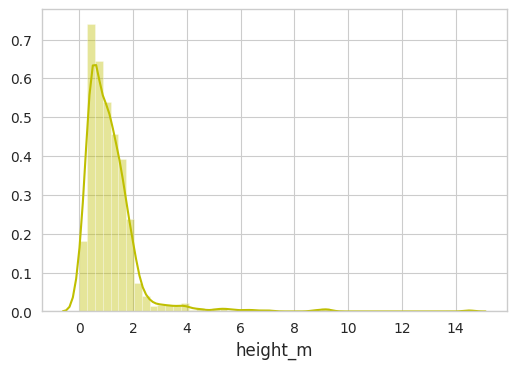

In [43]:
ax = sns.distplot(pokedata.height_m, color = 'y')

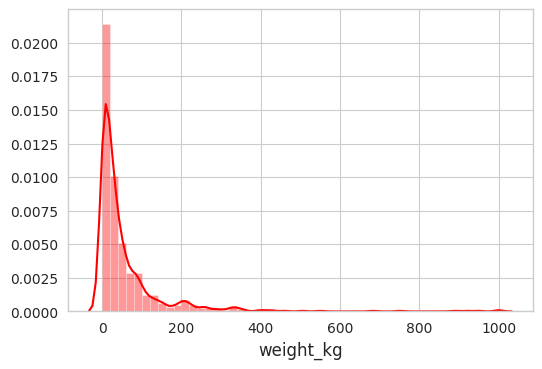

In [44]:
ax = sns.distplot(pokedata.weight_kg, color = 'r')

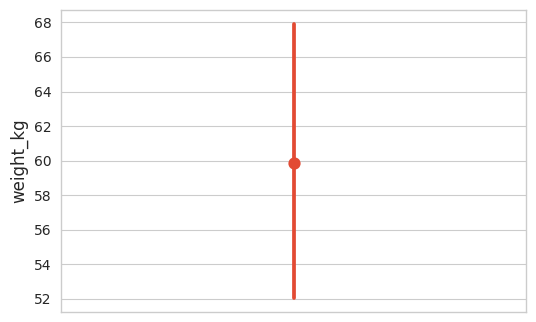

In [45]:
ax = sns.pointplot(pokedata.weight_kg, orient = 'v')

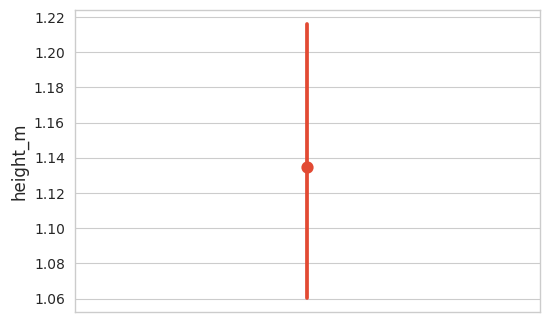

In [46]:
ax = sns.pointplot(pokedata.height_m, orient = 'v')

**Observations:**

* Average weight and height is ~59 kg and ~1.13 m respectively.
* Most Pokémon have a height of 0.1 - 4 meters and weigh between 1-200 kg.

### Base egg steps

The number of steps required to hatch an egg of the Pokémon.

In [47]:
pokedata.base_egg_steps.nunique()

10

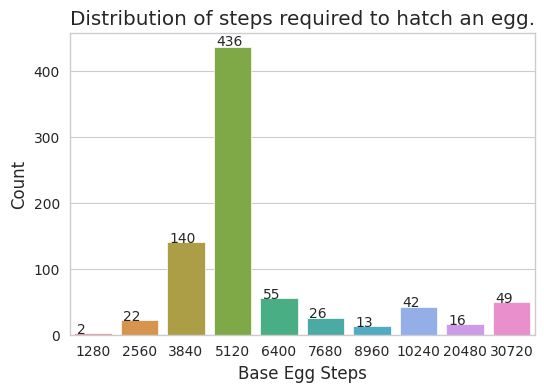

In [48]:
ax = sns.countplot(pokedata.base_egg_steps)
plt.xlabel('Base Egg Steps')
plt.ylabel('Count')
plt.title('Distribution of steps required to hatch an egg.')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

**Observations:**

* There are 10 unique number of steps required to hatch an egg.
* 436 Pokémon require 5120 steps to hatch their egg, second highest is 3840 steps for 140 Pokémon.

### Experience Growth

The experience growth of the Pokémon.

In [49]:
pokedata.experience_growth.nunique()

6

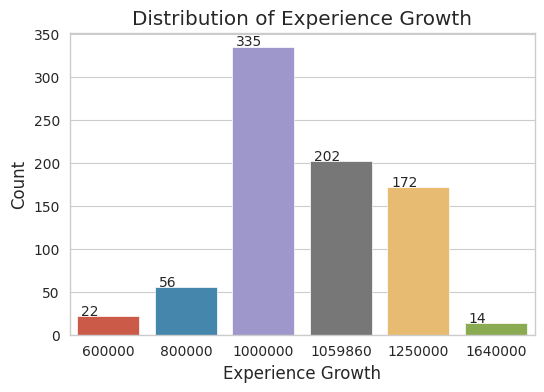

In [50]:
ax = sns.countplot(pokedata.experience_growth)
plt.xlabel('Experience Growth')
plt.ylabel('Count')
plt.title('Distribution of Experience Growth')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

**Observations:**

* There are only 6 unique levels of experience
* Most of the Pokémon have the experience in the range 1M - 1.25M

### Base Happiness

Base Happiness of the Pokémon.

In [51]:
pokedata.base_happiness.nunique()

6

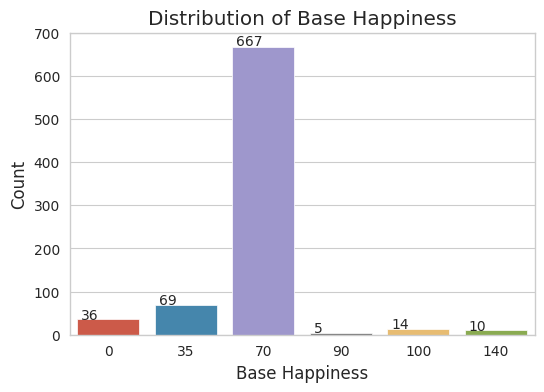

In [52]:
ax = sns.countplot(pokedata.base_happiness)
plt.xlabel('Base Happiness')
plt.ylabel('Count')
plt.title('Distribution of Base Happiness')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

**Observations:**

* There are 6 unique levels of happiness
* Majority of the Pokémon have the happiness index of 70
* Very few are extremely happy
* A handful Pokémon are always grumpy

**What can be done?**

We can decide based on the level of happiness wether their growth or strength gets affected in any way, positive or negative.

### HP

The base HP of the Pokémon

In [53]:
pokedata.hp.nunique()

99

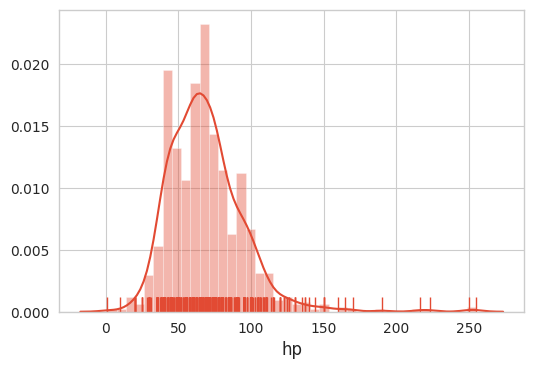

In [54]:
ax = sns.distplot(pokedata.hp, rug = True)

**Observation:**

Most Pokémon have the base hp in the range 25-150

**What can be done?**

We can see wether this desides their:
* Level of strength
* Depth in attack
* Resistance to other attacks

### Attack and Defence

The base attack and defence of Pokémon.

In [55]:
print('Attack:', pokedata.attack.nunique())
print('Defence:', pokedata.defense.nunique())

Attack: 114
Defence: 109


Text(0.5, 0, 'Stat')

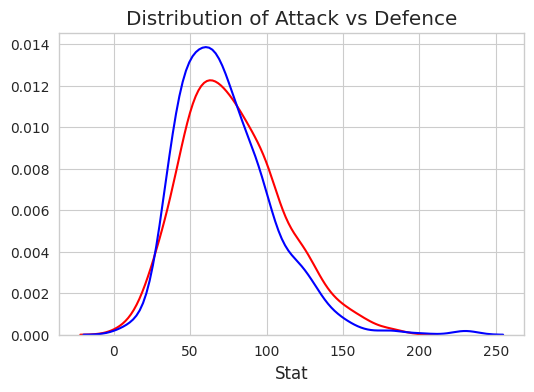

In [56]:
ax_attack = sns.distplot(pokedata.attack, color = 'r', hist = False)
ax_defence = sns.distplot(pokedata.defense, color = 'b', hist = False)

plt.title('Distribution of Attack vs Defence')
plt.xlabel('Stat')

### Special Attack and Special Defence

The base special attack and special defence of the Pokémon

In [57]:
print('Special Attack:', pokedata.sp_attack.nunique())
print('Special Defence:', pokedata.sp_defense.nunique())

Special Attack: 111
Special Defence: 97


Text(0.5, 0, 'Stats')

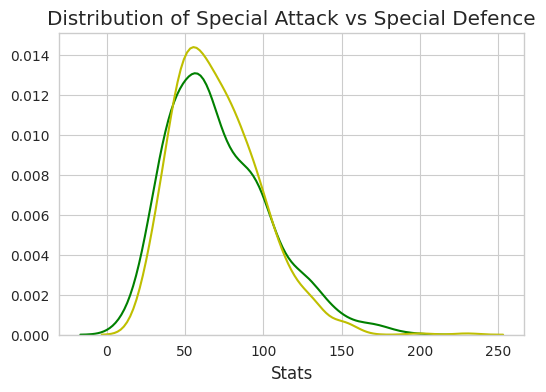

In [58]:
ax_attack = sns.distplot(pokedata.sp_attack, color = 'g', hist = False)
ax_defence = sns.distplot(pokedata.sp_defense, color = 'y', hist = False)

plt.title('Distribution of Special Attack vs Special Defence')
plt.xlabel('Stats')

**Observation:**

* Most Pokémon have their base attack and defence and respective specials in the range of 25-175.
* The end range of defence is more than that of attack.

**What can be done?**

* Correlation between attack and special attack. Same goes for defence as well.
* Relation with base hp
* Club relation with primary/secondary type of Pokémon.

### against_

There are 18 features that denote the amount of damage taken against an attack of a particular type.

Let us get the list of columns having string **against_**

In [59]:
cols = pokedata.columns
against = list()

for col in cols:
    if 'against_' in str(col):
        against.append(col)
        
print(len(against))
print(against)

18
['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


We have 18 as required and mentioned.

We would like to have a list of uique values across all these columns.

In [60]:
unique_element = list()

for col in against:
    unique_element.append(pokedata[col].unique().tolist())
    
result = list(set(q for p in unique_element for q in p))
result

[0.5, 1.0, 2.0, 0.25, 4.0, 0.0]

We can see that it takes a value only from the above mentioned values.

Now we can take the average of each of these columns and find the maximum to determine which attack majority of pokemon are susceptible to.

In [61]:
for col in against:
    if np.mean(pokedata[col]) > 1.2:
        print(col)
        
for col in against:
    if np.sum(pokedata[col]) > 1000:
        print(col)

against_ice
against_rock
against_rock


We see most Pokémon are more susceptible to attacks from ice and rock Pokémon.

Let us see the distribution of these values in each of the columns.

against_bug
[1.   0.5  0.25 2.   4.  ]


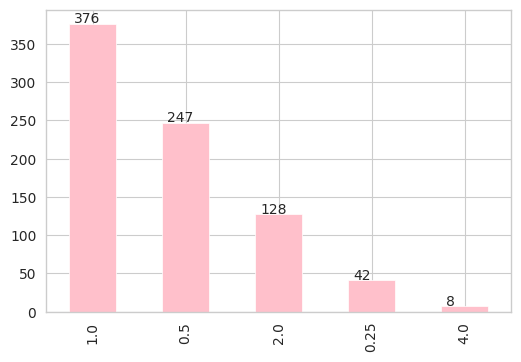

against_dark
[1.   0.5  2.   0.25 4.  ]


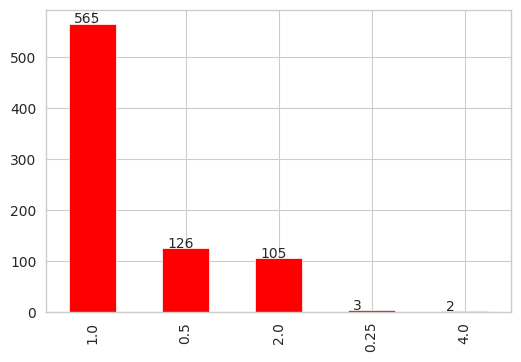

against_dragon
[1.  0.  0.5 2. ]


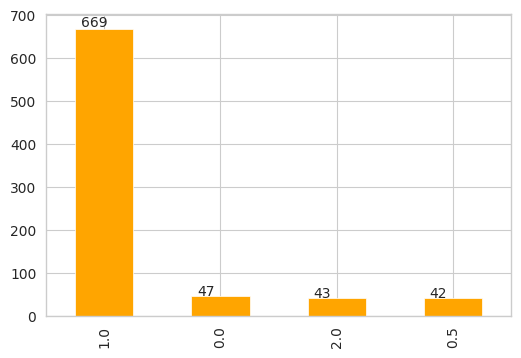

against_electric
[0.5  1.   2.   0.   4.   0.25]


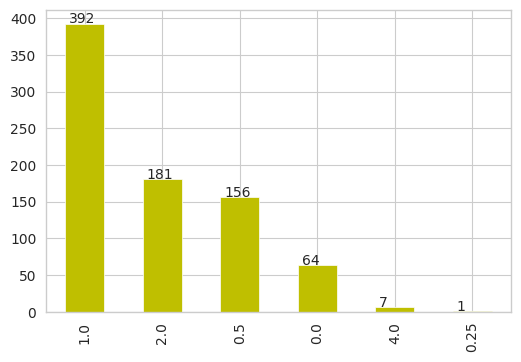

against_fairy
[0.5  1.   2.   0.25 4.  ]


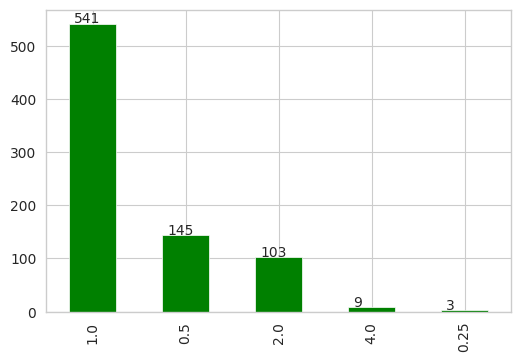

against_fight
[0.5  1.   0.25 2.   0.   4.  ]


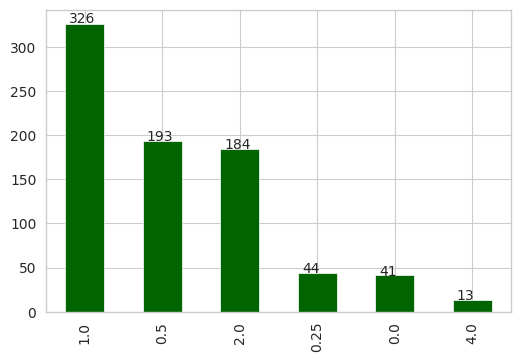

against_fire
[2.   0.5  1.   4.   0.25]


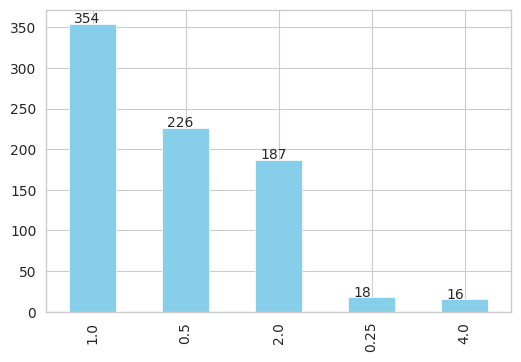

against_flying
[2.   1.   0.5  4.   0.25]


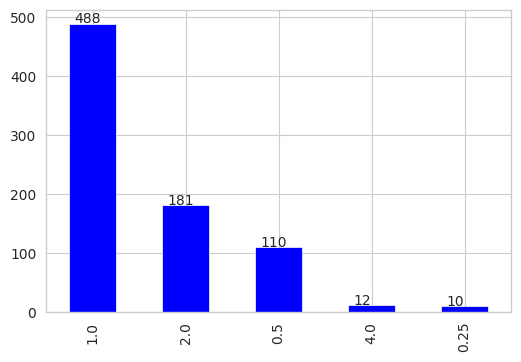

against_ghost
[1.  0.  2.  0.5 4. ]


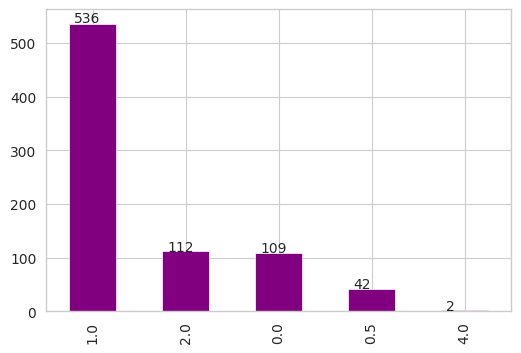

against_grass
[0.25 0.5  2.   1.   4.  ]


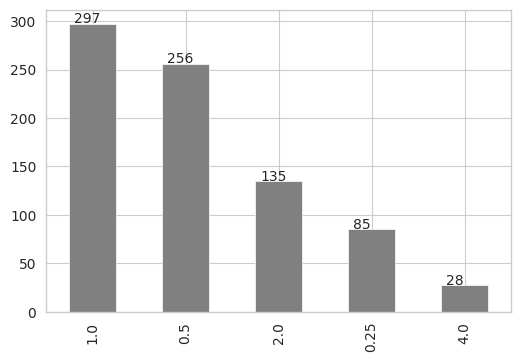

against_ground
[1.   2.   0.   0.5  0.25 4.  ]


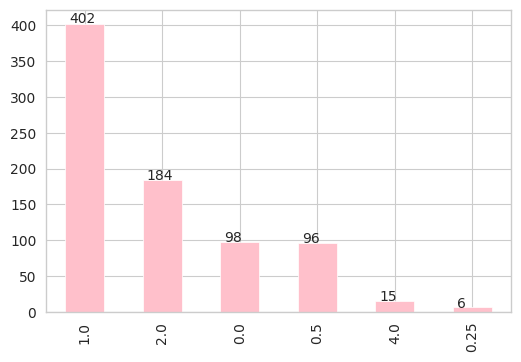

against_ice
[2.   0.5  1.   0.25 4.  ]


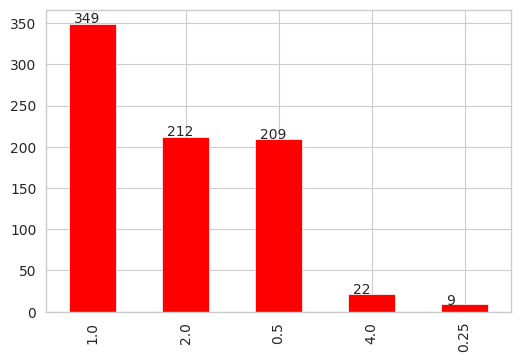

against_normal
[1.   0.5  0.   0.25]


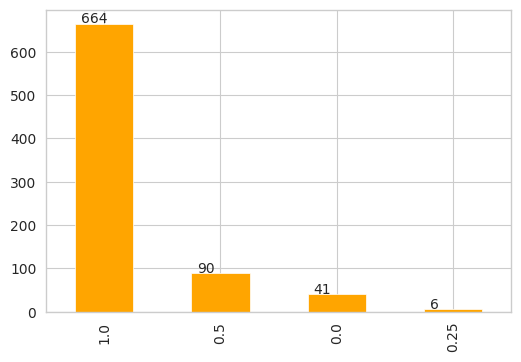

against_poison
[1.   0.5  0.25 2.   0.   4.  ]


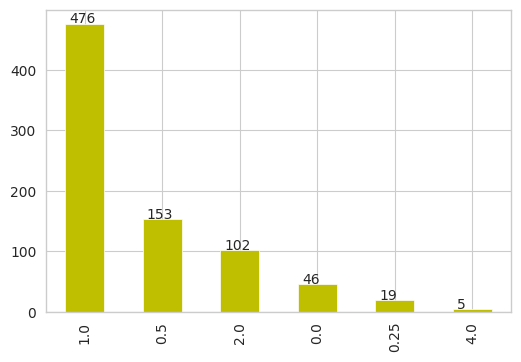

against_psychic
[2.   1.   0.5  0.   0.25 4.  ]


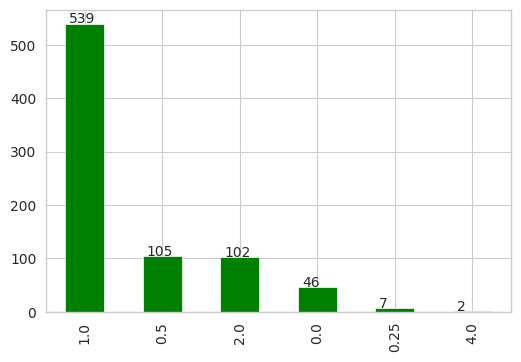

against_rock
[1.   2.   4.   0.5  0.25]


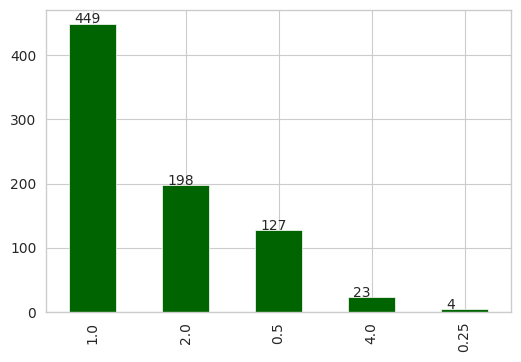

against_steel
[1.   0.5  2.   0.25 4.  ]


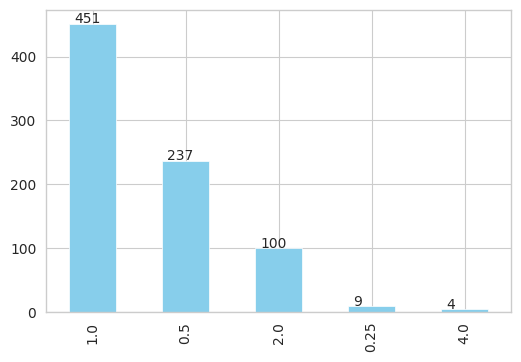

against_water
[0.5  2.   1.   4.   0.25]


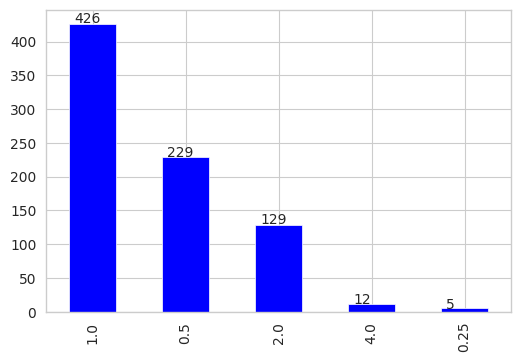

In [62]:
colors = ['pink', 'r', 'orange', 'y', 'g', 'darkgreen', 'skyblue', 'b', 'purple', 'gray']

for col in range(0, len(against)):
    print(against[col])
    print(pokedata[against[col]].unique())
    
    pp = pd.value_counts(pokedata[against[col]])
    
    ax = pp.plot.bar(color = colors[col % len(colors)])
    
    for each in ax.patches:
        ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))
    
    plt.show()

**Observations:**

* Most Pokémon suffer from every attack of atleast 1.0
* There are some Pokémon that can withstand certain attacks.

**What can be done?**

* We can relate which type of Pokémon is more susceptible to attacks against certain types of Pokémon.

### Speed

The base speed of Pokémon

In [63]:
print(pokedata.speed.nunique())

113


In [64]:
pokedata.speed.describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: speed, dtype: float64

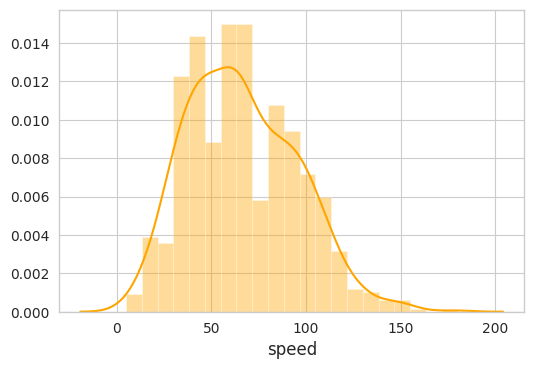

In [65]:
ax = sns.distplot(pokedata.speed, color = 'orange')

Now what is the fastest and slowest Pokémon?

In [66]:
print('Fastest Pokémon: {} {}'. format(pokedata.name[pokedata.speed.idxmax()], pokedata.speed[pokedata.speed.idxmax()]))
print('Slowest Pokémon: {} {}'. format(pokedata.name[pokedata.speed.idxmin()], pokedata.speed[pokedata.speed.idxmin()]))

Fastest Pokémon: Deoxys 180
Slowest Pokémon: Shuckle 5


We can come up with our own definition of speed.

* Fast Pokémon < Mean + Standard Deviation
* Slow Pokémon > Mean - Standard Deviation
* Very Fast Pokémon > Mean + 2 * Standard Deviation
* Very Slow Pokémon < Mean + 2 * Standard Deviation

Let's see what we get:

[113, 132, 23, 3, 530]


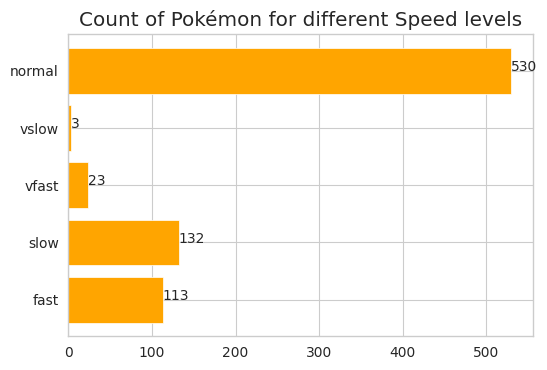

In [67]:
speed_statistics = pokedata.speed.describe()

mean = speed_statistics[1]
std_div = speed_statistics[2]

fast = pokedata[(pokedata.speed > mean + std_div) & (pokedata.speed < mean + 2 * std_div) ]['name']
slow = pokedata[(pokedata.speed < mean - std_div) & (pokedata.speed > mean - 2 * std_div)]['name']
vfast = pokedata[pokedata.speed > mean + 2 * std_div]['name']
vslow  = pokedata[pokedata.speed < mean - 2 * std_div]['name']
normal = pokedata[(pokedata.speed < mean + std_div) & (pokedata.speed > mean - std_div)]

speed_levels = ['fast', 'slow', 'vfast', 'vslow', 'normal']
speed_count = list(map(len, [fast, slow, vfast, vslow, normal]))
print(speed_count)

plt.barh(np.array(range(len(speed_count))), speed_count, color  = 'orange')
plt.yticks(np.array(range(len(speed_count))), speed_levels)
plt.title('Count of Pokémon for different Speed levels')

for index, value in enumerate(speed_count):
    plt.text(value, index, str(value))
    
plt.show()

**Observations:**

* Over 500 Pokémon have speed within the mean and single standard deviation which is normal for our standards.
* A small portion has been labeled as fast and slow
* An even smaller portion has been termed as very fast and very slow

**What can be done?**

* We can relate speed tostrength of attack and the type of Pokémon it is.
* We can even add these features as well if modelling is done at a later time.

### Generation

The number of generation which the pokemon was first intoduced.

In [68]:
pokedata.generation.nunique()

7

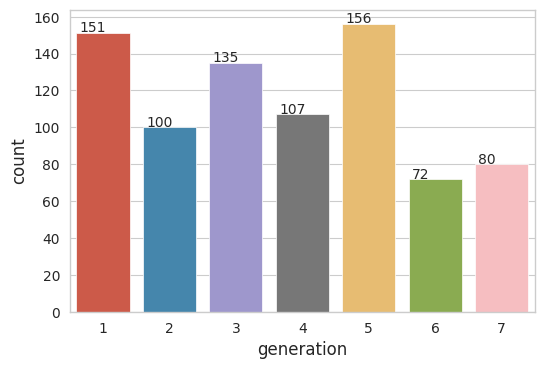

In [69]:
ax = sns.countplot(x = 'generation', data = pokedata)

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

Let's visualise it in terms of percentage:

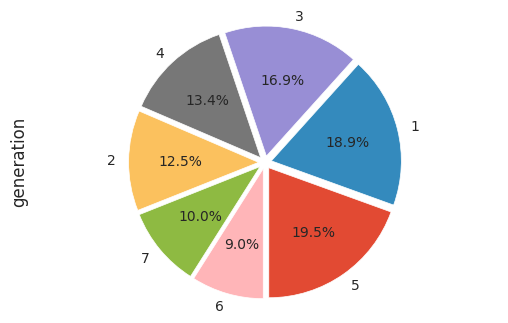

In [70]:
pp = pd.value_counts(pokedata.generation)
pp.plot.pie(startangle = 270, autopct = '%1.1f%%', shadow = False, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal')
plt.show()

**Observations:**

* A bulk of Pokémon are from 1st and 5th generations.

**What else can be done?**

We will see if later generation Pokemon have more hp, are legendary or sufficient attack capabilities.

### Is Legendary

denotes if the pokemon is legendary or not.

Text(0, 0.5, 'Count')

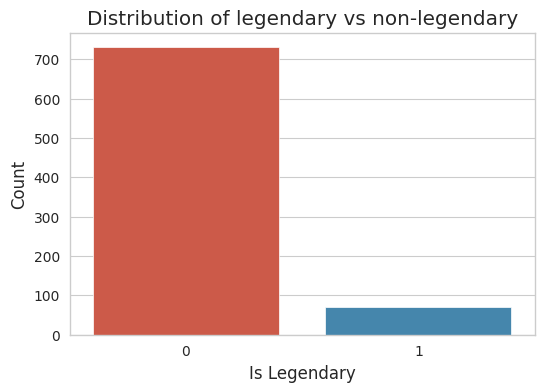

In [71]:
ax = sns.countplot(x = pokedata.is_legendary, data = pokedata)
plt.title('Distribution of legendary vs non-legendary')
plt.xlabel('Is Legendary')
plt.ylabel('Count')


**Observation:**

* Less than 100 Pokémon are legendary.

**What can be done?**

* See wether legendary Pokémon have exceptional statistics.
* What makes them so special to attain status of legend

### Pokémon type combinations

We have already seen what are the most and least common type of Pokémon, it will also be interesting to see all the type combination of the Pokémon, note that we will not include Pokémon that doesn't have secondary type.